In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import random
import cv2
import time
import csv
from ultralytics import YOLO
import json
import os
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import io
import requests
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import kagglehub

In [3]:
train_images = r"./train/images"

train_labels = r"./train/labels"

In [4]:
train_images

'./train/images'

In [5]:
train_labels

'./train/labels'

In [6]:
train_path = './train/images'
val_path = './test/images'

print("Train directory exists:", os.path.exists(train_path))
print("Val directory exists:", os.path.exists(val_path))

Train directory exists: False
Val directory exists: False


In [7]:
path = kagglehub.dataset_download("valentynsichkar/yolo-coco-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ygoku\.cache\kagglehub\datasets\valentynsichkar\yolo-coco-data\versions\3


In [8]:
weights_path = r'C:\Users\ygoku\.cache\kagglehub\datasets\valentynsichkar\yolo-coco-data\versions\3\yolov3.weights'
configuration_path = r'C:\Users\ygoku\.cache\kagglehub\datasets\valentynsichkar\yolo-coco-data\versions\3\yolov3.cfg'
labels_path = r'C:\Users\ygoku\.cache\kagglehub\datasets\valentynsichkar\yolo-coco-data\versions\3\coco.names'

In [9]:
labels = open(labels_path).read().strip().split('\n')
print("COCO  dataset contains", len(labels),"labels")
print("\nPrinting the names below for reference:\n",labels) 

COCO  dataset contains 80 labels

Printing the names below for reference:
 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')


train_images = "./train/images"
train_labels = "./train/labels"
image_files = os.listdir(train_images)

random_images = random.sample(image_files, 16)
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()



In [9]:
with open('data_1.yaml', 'r') as f:

    data = f.read()

print(data)


train: C:/Users/svani/Desktop/YOLO/train/images
val: C:/Users/svani/Desktop/YOLO/valid/images

nc: 101
names:  ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush','ambulance', 'army vehic

In [10]:
names=  ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush','ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']

In [11]:
len(names)

101

In [9]:
h, w, c = image.shape

print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x359 and 3 channels.



image 1/1 C:\Users\WGRACY.ai\Desktop\Ramya\train\images\Navid_683_jpg.rf.a972c718d70e4d43a06bc5bad469e9e8.jpg: 256x416 2 persons, 6 cars, 2 motorcycles, 194.7ms
Speed: 3.2ms preprocess, 194.7ms inference, 619.8ms postprocess per image at shape (1, 3, 256, 416)


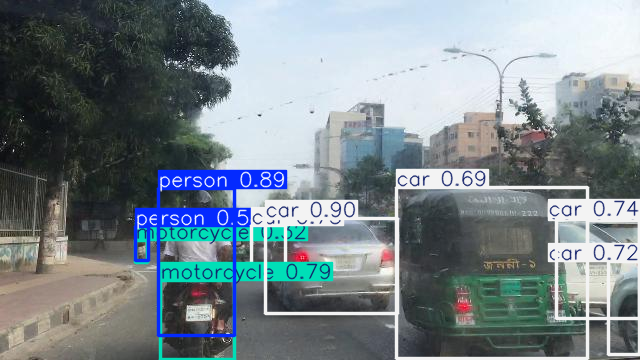

In [10]:
model = YOLO("yolov8x.pt")

result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


0: 256x416 2 persons, 6 cars, 2 motorcycles, 21.5ms
Speed: 0.0ms preprocess, 21.5ms inference, 12.8ms postprocess per image at shape (1, 3, 256, 416)

0: 416x256 1 person, 1 car, 1 motorcycle, 2 trucks, 148.0ms
Speed: 2.0ms preprocess, 148.0ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 256)

0: 416x320 3 cars, 3 trucks, 177.0ms
Speed: 0.0ms preprocess, 177.0ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 320)

0: 256x416 5 persons, 1 car, 3 motorcycles, 1 truck, 28.9ms
Speed: 0.0ms preprocess, 28.9ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 person, 1 car, 3 buss, 1 truck, 1 chair, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 3 persons, 1 motorcycle, 17.6ms
Speed: 5.0ms preprocess, 17.6ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 person, 1 bus, 3 trucks, 21.9ms
Speed: 13.9ms preprocess, 21.9ms inference, 3.0ms 

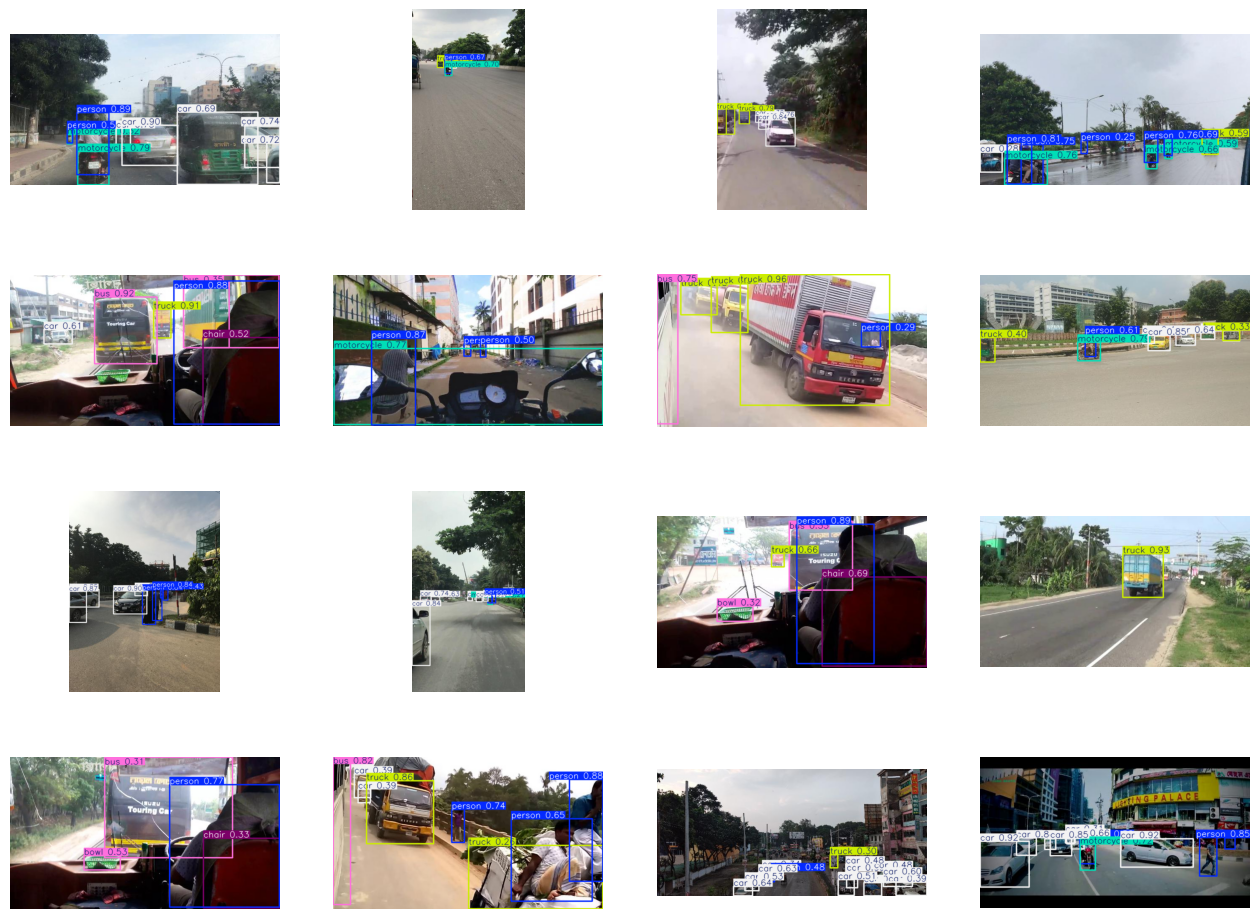

In [11]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    result_predict = model.predict(image, imgsz=(416))

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

    axs[row,col].imshow(plot)
    axs[row,col].axis('off')

plt.show()

In [ ]:
model.train(data = './data_1.yaml',
            epochs = 30,
            imgsz = h,
            seed = 42,
            batch = 8,
            workers = 4)

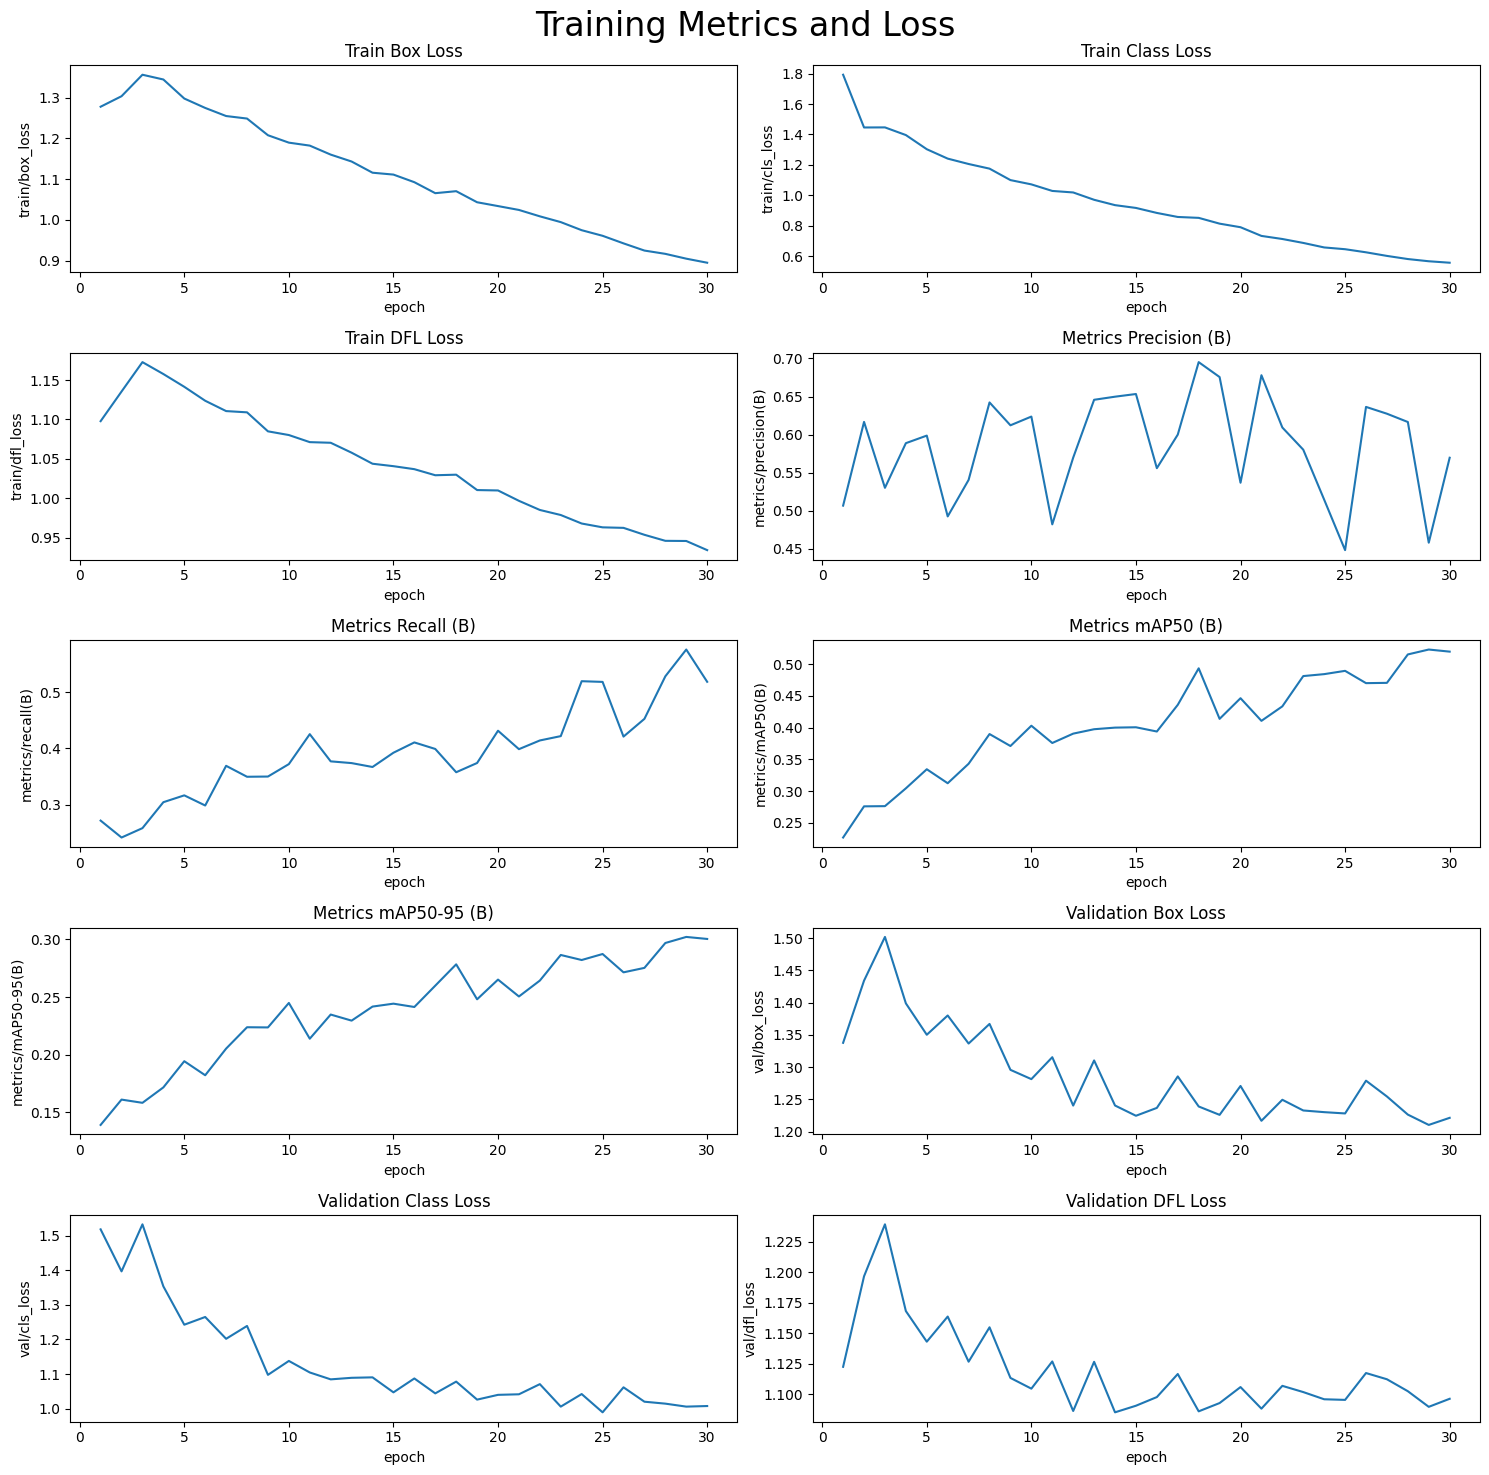

In [15]:
df = pd.read_csv('C:\\Users\\svani\\Desktop\\YOLO\\runs\\detect\\train14\\results.csv')


df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


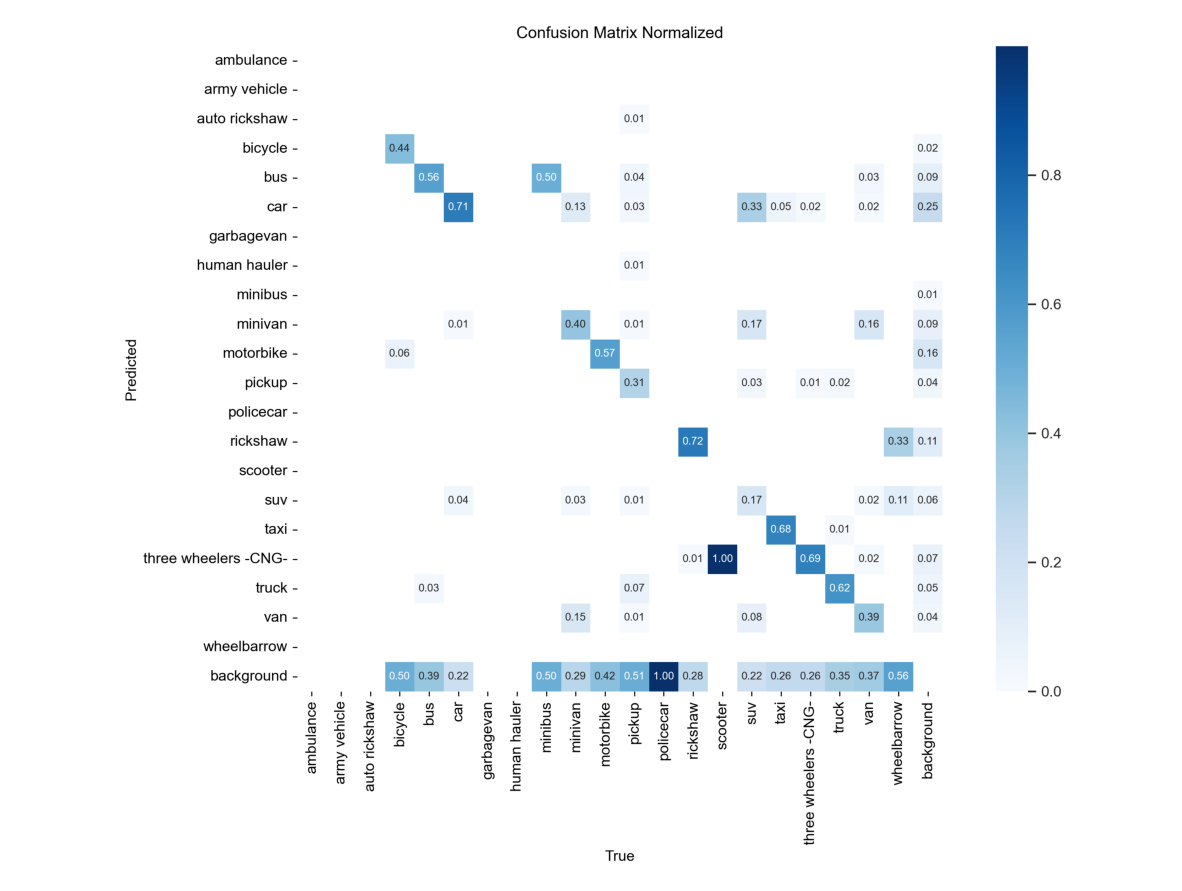

In [16]:
img = mpimg.imread('C:\\Users\\svani\\Desktop\\YOLO\\runs\\detect\\train14\\confusion_matrix_normalized.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [17]:
model.save('yolov8n.pt')

# Exceptional Serialization and deserialization

In [28]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

cap = cv2.VideoCapture(0)  
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model.predict(rgb_frame)

    annotated_frame = results[0].plot()
    cv2.imshow('YOLO Webcam Feed', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [01:50<00:00, 59.0kB/s]



0: 480x640 1 person, 71.5ms
Speed: 3.0ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 87.2ms
Speed: 2.0ms preprocess, 87.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 72.5ms
Speed: 2.0ms preprocess, 72.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 76.1ms
Speed: 1.0ms preprocess, 76.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 traffic light, 71.8ms
Speed: 1.0ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 traffic light, 74.6ms
Speed: 2.0ms preprocess, 74.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 65.5ms
Speed: 1.0ms preprocess, 65.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 cell phone, 64.5ms
Speed: 1.0ms preprocess, 64.5ms inference

In [3]:
model = YOLO('yolov8n.pt')  
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

# Testing

In [3]:
import os
import random
import cv2
import time
import csv
from ultralytics import YOLO
import json
import os
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import io
import requests
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import kagglehub

In [4]:
model = YOLO('yolov8n.pt')  

In [5]:
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 9929,
  "response_mime_type": "application/json",
}

In [6]:
generation_config

{'temperature': 1,
 'top_p': 0.95,
 'top_k': 64,
 'max_output_tokens': 9929,
 'response_mime_type': 'application/json'}

In [ ]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()
detection_times = {}

detection_threshold = 5

def generate_observation_report(file_path):
    try:
        df = pd.read_csv(file_path)
        if df.empty:
            print("No detections to report.")
            return
        
        total_detections = df.shape[0]
        detection_counts = df['Object Label'].value_counts()
        average_confidence = df.groupby('Object Label')['Confidence'].mean()
        
        print("\n********* Observation Report **********")
        print(f"Total Detections: {total_detections}")
        print("Detections by Object:")
        for obj, count in detection_counts.items():
            print(f"  {obj}: {count} times, Avg Confidence: {average_confidence[obj]:.2f}")
    except Exception as e:
        print(f"Error generating report: {e}")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break
            
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model.predict(rgb_frame)
        annotated_frame = results[0].plot()
        
        current_detections = []
        if results[0].boxes:
            for box in results[0].boxes:
                class_id = int(box.cls[0])
                label = results[0].names[class_id]
                confidence = box.conf[0].item()
                current_detections.append((label, confidence))
                
                if label not in detection_times:
                    detection_times[label] = time.time()
                else:
                    elapsed_time = time.time() - detection_times[label]
                    if elapsed_time >= detection_threshold:
                        log_detection(label, confidence) # type: ignore
                        detection_times.pop(label)
                        
        for label in list(detection_times.keys()):
            if label not in [det[0] for det in current_detections]:
                detection_times.pop(label)
        
        cv2.imshow('YOLO Webcam Feed', annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [9]:
data = pd.read_csv(r'detected_objects_log.csv', on_bad_lines='skip')

In [10]:
print(data)

   Object Label  Confidence
0        person        0.89
1        person        0.90
2        person        0.92
3        person        0.93
4        person        0.94
5         chair        0.71
6        person        0.93
7        bottle        0.81
8        person        0.92
9        person        0.94
10       person        0.94
11       person        0.93
12       person        0.94
13       person        0.92
14       person        0.86
15       person        0.90
16       person        0.84
17       person        0.90
18       person        0.87
19       person        0.95
20       person        0.94
21       person        0.92
22       bottle        0.60
23       person        0.92
24       person        0.92
25        chair        0.81
26       person        0.90
27       person        0.93
28       person        0.90
29       person        0.94
30       person        0.91
31   cell phone        0.95
32       person        0.88
33          tie        0.46
34       person     

In [11]:
data.shape

(59, 2)

In [12]:
with open('api.txt') as f:
    key = f.read()

In [13]:
genai.configure(api_key=key)

In [14]:
nmodel = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    system_instruction="""
    You will receive a structured input containing detected objects with their timestamps and confidence levels.
    Your task is to analyze this information and respond with a summary of what was detected. 
    Example: "I detected a person and a car with high confidence levels."""
)

print(dir(nmodel)) 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_async_client', '_client', '_generation_config', '_get_tools_lib', '_model_name', '_prepare_request', '_safety_settings', '_system_instruction', '_tool_config', '_tools', 'cached_content', 'count_tokens', 'count_tokens_async', 'from_cached_content', 'generate_content', 'generate_content_async', 'model_name', 'start_chat']


In [15]:
data

,Object Label,Confidence
0,person,0.89
1,person,0.90
2,person,0.92
3,person,0.93
4,person,0.94
5,chair,0.71
6,person,0.93
7,bottle,0.81
8,person,0.92
9,person,0.94


In [16]:
full_scenario_description = ""

In [17]:
full_scenario_description = ""
for index, row in data.iterrows():
    try:
        timestamp = row['Timestamp']  # Adjust based on your column name
        detected_object = row['Object Label']  # Adjust based on your column name
        confidence = row['Confidence']  # Adjust based on your column name

        # Format the description
        full_scenario_description += f"{timestamp} - Detected '{detected_object}' with confidence {confidence}\n"
    except KeyError as e:
        print(f"Error processing row {index}: Missing column {e}. Row content: {row}")
    except ValueError as e:
        print(f"Value error for row {index}: {e}. Row content: {row}")


Error processing row 0: Missing column 'Timestamp'. Row content: Object Label    person
Confidence        0.89
Name: 0, dtype: object
Error processing row 1: Missing column 'Timestamp'. Row content: Object Label    person
Confidence         0.9
Name: 1, dtype: object
Error processing row 2: Missing column 'Timestamp'. Row content: Object Label    person
Confidence        0.92
Name: 2, dtype: object
Error processing row 3: Missing column 'Timestamp'. Row content: Object Label    person
Confidence        0.93
Name: 3, dtype: object
Error processing row 4: Missing column 'Timestamp'. Row content: Object Label    person
Confidence        0.94
Name: 4, dtype: object
Error processing row 5: Missing column 'Timestamp'. Row content: Object Label    chair
Confidence       0.71
Name: 5, dtype: object
Error processing row 6: Missing column 'Timestamp'. Row content: Object Label    person
Confidence        0.93
Name: 6, dtype: object
Error processing row 7: Missing column 'Timestamp'. Row content:

In [41]:
nmodel = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    system_instruction="""
        You will receive structured input containing information on detected objects, including their spatial positions, confidence levels, and movement patterns.
        Your task is to convert this information into a highly descriptive, context-aware summary designed to assist people who are blind by conveying relevant details about their surroundings in an accessible, real-time format.

        Focus on the following:
        - **Sound and Auditory Cues**: Suggest possible sounds associated with objects (e.g., "a person talking nearby" or "a vehicle engine in the distance") to help users understand the nature of detected objects.
        - **Movement and Distance**: Emphasize the object's movement (e.g., approaching, receding, stationary) and approximate distance (close, moderate, distant) relative to the user for better spatial awareness.
        - **Relative Location**: Clearly indicate the position of each object relative to the user (e.g., "to your left," "in front of you," "moving away to your right").
        - **Significance of Repeated or Sustained Presence**: Identify objects that appear repeatedly or remain for longer periods, as these may be important for navigation and safety.
        
        **Example Output:**
        "A person was detected to your left, appearing multiple times as they moved around your vicinity, possibly walking back and forth. A second individual seemed nearby later, slightly closer and stationary for a short while. Additionally, at several points, a remote control was detected intermittently in the environment, occasionally at a moderate distance to your right. The remote was inactive in between, indicating it may have been picked up and set down repeatedly."

        Provide these observations in a concise, sequential format, using simple language to prioritize safety and spatial orientation.
    """
)


In [42]:
generation_config

{}

In [43]:
response = nmodel.generate_content(full_scenario_description)  

In [44]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': 'There appears to be a person moving around in your vicinity. They were detected multiple times in a short period, suggesting they might be walking back and forth. Later, another person was detected, appearing briefly and remaining still. \n'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)

In [45]:
print("Response Structure:", response)

Response Structure: response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': 'There appears to be a person moving around in your vicinity. They were detected multiple times in a short period, suggesting they might be walking back and forth. Later, another person was detected, appearing briefly and remaining still. \n'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)


In [46]:
if hasattr(response, 'candidates') and response.candidates:
    first_candidate = response.candidates[0]

    generated_text = first_candidate.content.parts[0].text.strip()
    description = f"Observation Report: {generated_text}."
    
    print(description)  
else:
    print("Failed to generate content or no candidates available.")


Observation Report: There appears to be a person moving around in your vicinity. They were detected multiple times in a short period, suggesting they might be walking back and forth. Later, another person was detected, appearing briefly and remaining still.. This observation indicates a consistent presence of the detected objects with high confidence levels.


# PIPELINE

In [1]:
import os
import random
import cv2
import time
import csv
from ultralytics import YOLO
import json
import os
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import io
import requests
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import kagglehub
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from gtts import gTTS

In [2]:
model = YOLO('yolov8n.pt')

In [3]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
with open('api.txt') as f:
    key = f.read()

In [5]:
genai.configure(api_key=key)

In [6]:
generation_config = {
  "temperature": 0.95,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 9097,
  "response_mime_type": "application/json",
}


In [7]:
full_scenario_description = ""

In [8]:
nmodel = genai.GenerativeModel(
    model_name="gemini-1.5-flash-8b-exp-0924",
    generation_config=generation_config,
    system_instruction="""
    You will receive structured input containing detected objects and confidence levels.
    Your task is to analyze this information and provide a detailed summary of all the detected objects without timings,just say what was there, to aid users who are visually impaired.
    example:
    observation summary :" i saw a man and a phone close by him", i want information to be in this format
    """
)


In [ ]:
# detection_times = {}
# detection_threshold = 5
# detection_path = "detected_objects_log.csv"

# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     exit()

# def log_detection(label, confidence):
#     with open(detection_path, mode="a", newline="") as log_file:
#         csv_writer = csv.writer(log_file)
#         if log_file.tell() == 0:
#             csv_writer.writerow(["Object Label", "Confidence"])
#         csv_writer.writerow([label, f"{confidence:.2f}"])
#         log_file.flush()
#     print(f"Logged: {label}, {confidence:.2f}")

# def generate_observation_report(file_path):
#     try:
#         df = pd.read_csv(file_path)
#         if df.empty:
#             print("No detections to report.")
#             return
        
#         total_detections = df.shape[0]
#         detection_counts = df['Object Label'].value_counts()
#         average_confidence = df.groupby('Object Label')['Confidence'].mean()
        
#         print("\n********* Observation Report **********")
#         print(f"Total Detections: {total_detections}")
#         print("Detections by Object:")
#         for obj, count in detection_counts.items():
#             print(f"  {obj}: {count} times, Avg Confidence: {average_confidence[obj]:.2f}")
#     except Exception as e:
#         print(f"Error generating report: {e}")

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Failed to grab frame.")
#         break
        
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     results = model.predict(rgb_frame)
#     annotated_frame = results[0].plot()
    
#     current_detections = []
#     if results[0].boxes:
#         for box in results[0].boxes:
#             class_id = int(box.cls[0])
#             label = results[0].names[class_id]
#             confidence = box.conf[0].item()
#             current_detections.append((label, confidence))
            
#             if label not in detection_times:
#                 detection_times[label] = time.time()
#             else:
#                 elapsed_time = time.time() - detection_times[label]
#                 if elapsed_time >= detection_threshold:
#                     log_detection(label, confidence)
#                     detection_times.pop(label)
                    
#     for label in list(detection_times.keys()):
#         if label not in [det[0] for det in current_detections]:
#             detection_times.pop(label)
    
#     cv2.imshow('YOLO Webcam Feed', annotated_frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

# data = pd.read_csv(detection_path, on_bad_lines='skip')
# full_scenario_description = ""
# for index, row in data.iterrows():
#     try:
#         detected_object = row['Object Label']
#         confidence = row['Confidence']
        
#         full_scenario_description += f"Detected '{detected_object}' with confidence {confidence}\n"
#     except KeyError as e:
#         print(f"Error processing row {index}: Missing column {e}. Row content: {row}")
#     except ValueError as e:
#         print(f"Value error for row {index}: {e}. Row content: {row}")

# response = nmodel.generate_content(full_scenario_description)  
# generate_observation_report(detection_path)

# if hasattr(response, 'candidates') and response.candidates:
#     first_candidate = response.candidates[0]
#     generated_text = first_candidate.content.parts[0].text.strip()
#     description = f"My Observation is : {generated_text}."
#     s = "!@#$%^&*()[]}{"
#     for i in s:
#         if i in description:
#             description = description.replace(i, '')
#     print(description)
# else:
#     print("Failed to generate content or no candidates available.")

# fig2 = px.histogram(data, x='Object Label', title="Detections by Object", color='Object Label')
# fig2.update_layout(xaxis_title="Object", yaxis_title="Detection Count")

# average_confidence = data.groupby("Object Label")["Confidence"].mean().reset_index()
# fig3 = px.bar(average_confidence, x='Object Label', y='Confidence', title="Average Confidence by Object", color='Confidence')
# fig3.update_layout(xaxis_title="Object", yaxis_title="Average Confidence")

# fig2.show()
# fig3.show()
# tts = gTTS(text=description, lang='en')
# tts.save("observation_report.mp3")

# os.system("start observation_report.mp3")


0: 480x640 1 bird, 108.9ms
Speed: 3.0ms preprocess, 108.9ms inference, 7.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 62.2ms
Speed: 4.0ms preprocess, 62.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 62.4ms
Speed: 1.0ms preprocess, 62.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 59.6ms
Speed: 1.2ms preprocess, 59.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 55.9ms
Speed: 2.0ms preprocess, 55.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 58.8ms
Speed: 1.0ms preprocess, 58.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 54.8ms
Speed: 1.0ms preprocess, 54.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 50.9ms
Speed: 1.0ms preprocess, 50.9ms inferenc

0

In [ ]:
# execution code 

inga dhan click pani run pananum 

In [ ]:
# import serial
# import csv
# import time
# import cv2
# import pandas as pd
# import plotly.express as px
# from gtts import gTTS
# import os
# from ultralytics import YOLO  # YOLOv8 library

# # Serial port setup
# SERIAL_PORT = 'COM8'
# BAUD_RATE = 9600
# CSV_FILE = 'distance_data.csv'
# AUDIO_REPORT_FILE = "observation_report.mp3"

# # Initialize YOLO model
# YOLO_MODEL_PATH = "yolov8n.pt"  # Replace with your YOLOv8 model path
# model = YOLO(YOLO_MODEL_PATH)

# # Initialize distance data
# distance_data = {}

# # Initialize serial communication
# try:
#     ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
#     print(f"Connected to {SERIAL_PORT} at {BAUD_RATE} baud.")
# except serial.SerialException as e:
#     print(f"Error: Could not open serial port: {e}")
#     exit()

# # Open webcam
# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     exit()

# # Distance logging setup
# with open(CSV_FILE, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Object Label', 'Distance (cm)'])  # Write CSV header

#     print("Starting object detection and distance measurement...")
#     try:
#         while True:
#             # Read frame from webcam
#             ret, frame = cap.read()
#             if not ret:
#                 print("Error: Failed to grab frame.")
#                 break

#             # Perform YOLO detection
#             results = model.predict(frame)
#             annotated_frame = results[0].plot()

#             # Process YOLO detections
#             if results[0].boxes:
#                 for box in results[0].boxes:
#                     class_id = int(box.cls[0])
#                     label = results[0].names[class_id]
#                     confidence = box.conf[0].item()

#                     # Read distance from Arduino
#                     if ser.in_waiting > 0:
#                         data = ser.readline().decode('utf-8').strip()
#                         if data.startswith("Distance: "):
#                             distance = float(data.split(" ")[1])

#                             # Update distance data
#                             if label not in distance_data:
#                                 distance_data[label] = {'total_distance': 0, 'count': 0}
#                             distance_data[label]['total_distance'] += distance
#                             distance_data[label]['count'] += 1

#                             writer.writerow([label, distance])
#                             print(f"Detected: {label} - {distance:.2f} cm, Confidence: {confidence:.2f}")

#             # Display annotated frame
#             cv2.imshow('YOLO Detection with Distance', annotated_frame)
#             if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break

#     except KeyboardInterrupt:
#         print("\nDetection stopped by user.")
#     except Exception as e:
#         print(f"Error: {e}")
#     finally:
#         cap.release()
#         cv2.destroyAllWindows()
#         ser.close()
#         print("Resources released.")

# # Generate observation report
# def generate_observation_report(file_path, distance_data):
#     try:
#         df = pd.read_csv(file_path)
#         if df.empty:
#             print("No detections to report.")
#             return

#         total_detections = df.shape[0]
#         detection_counts = df['Object Label'].value_counts()
#         descriptions = []

#         print("\n********* Observation Report **********")
#         print(f"Total Detections: {total_detections}")
#         print("Detections by Object:")
#         for obj, count in detection_counts.items():
#             avg_distance = distance_data[obj]['total_distance'] // distance_data[obj]['count']
#             description = f"Detected {obj}  with an approximate distance of {avg_distance:.2f} cm."
#             descriptions.append(description)
#             print(description)

#         # Combine all descriptions into a single report
#         full_report = "\n".join(descriptions)
#         print("\nFull Observation Report:")
#         print(full_report)

#         # Save report as audio
#         tts = gTTS(text=full_report, lang='en')
#         tts.save(AUDIO_REPORT_FILE)
#         os.system(f"start {AUDIO_REPORT_FILE}")

#     except Exception as e:
#         print(f"Error generating report: {e}")

# # Generate report and use language model
# generate_observation_report(CSV_FILE, distance_data)

# # Prepare scenario description for language model
# full_scenario_description = ""
# for label, data in distance_data.items():
#     try:
#         avg_distance = data['total_distance'] / data['count']
#         full_scenario_description += f"Detected '{label}'  with an approximate distance of {avg_distance} cm.\n"
#     except KeyError as e:
#         print(f"Error processing object {label}: Missing data {e}.")
#     except ValueError as e:
#         print(f"Value error for object {label}: {e}.")

# # Use language model for additional insights (optional)
# try:
#     response = nmodel.generate_content(full_scenario_description)  # Replace with your language model call
#     if hasattr(response, 'candidates') and response.candidates:
#         first_candidate = response.candidates[0]
#         generated_text = first_candidate.content.parts[0].text.strip()
#         print(f"Generated Content: {generated_text}")
#     else:
#         print("Failed to generate content or no candidates available.")
# except Exception as e:
#     print(f"Error generating content: {e}")


Connected to COM8 at 9600 baud.
Starting object detection and distance measurement...

0: 480x640 (no detections), 49.7ms
Speed: 3.3ms preprocess, 49.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 57.0ms
Speed: 2.0ms preprocess, 57.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 49.3ms
Speed: 2.0ms preprocess, 49.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 53.2ms
Speed: 2.0ms preprocess, 53.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 50.1ms
Speed: 1.0ms preprocess, 50.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 48.1ms
Speed: 0.0ms preprocess, 48.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 45.4ms
Speed: 1.5ms preprocess, 45.4ms inference, 1.1ms postprocess per image at shape 

In [9]:
import serial
import csv
import time
import cv2
import pandas as pd
import plotly.express as px
from gtts import gTTS
import os
from ultralytics import YOLO  # YOLOv8 library

# === CONFIGURATION ===
SERIAL_PORT = 'COM8'
BAUD_RATE = 9600
CSV_FILE = 'distance_data.csv'
AUDIO_REPORT_FILE = "observation_report.mp3"
YOLO_MODEL_PATH = "yolov8n.pt"  # Replace with your YOLOv8 model path

# === INITIALIZE YOLO ===
model = YOLO(YOLO_MODEL_PATH)

# === DISTANCE STORAGE ===
distance_data = {}

# === SERIAL SETUP ===
try:
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    print(f"Connected to {SERIAL_PORT} at {BAUD_RATE} baud.")
except serial.SerialException as e:
    print(f"Error: Could not open serial port: {e}")
    exit()

# === WEBCAM SETUP ===
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# === CSV LOGGING ===
with open(CSV_FILE, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Object Label', 'Distance (cm)'])

    print("Starting object detection and distance measurement...")
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Failed to grab frame.")
                break

            # === YOLO DETECTION ===
            results = model.predict(frame)
            annotated_frame = results[0].plot()

            # === PROCESS RESULTS ===
            if results[0].boxes:
                for box in results[0].boxes:
                    class_id = int(box.cls[0])
                    label = results[0].names[class_id]
                    confidence = box.conf[0].item()

                    # === READ DISTANCE FROM ARDUINO ===
                    if ser.in_waiting > 0:
                        data = ser.readline().decode('utf-8').strip()
                        if data.startswith("Distance: "):
                            distance = float(data.split(" ")[1])

                            if label not in distance_data:
                                distance_data[label] = {'total_distance': 0, 'count': 0}
                            distance_data[label]['total_distance'] += distance
                            distance_data[label]['count'] += 1

                            writer.writerow([label, distance])
                            print(f"Detected: {label} - {distance:.2f} cm, Confidence: {confidence:.2f}")

            cv2.imshow('YOLO Detection with Distance', annotated_frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    except KeyboardInterrupt:
        print("\nDetection stopped by user.")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        cap.release()
        cv2.destroyAllWindows()
        ser.close()
        print("Resources released.")

# === REPORT GENERATION ===
def generate_observation_report(file_path, distance_data):
    try:
        df = pd.read_csv(file_path)
        if df.empty:
            print("No detections to report.")
            return

        total_detections = df.shape[0]
        detection_counts = df['Object Label'].value_counts()
        descriptions = []

        print("\n********* Observation Report **********")
        print(f"Total Detections: {total_detections}")
        print("Detections by Object:")
        for obj, count in detection_counts.items():
            avg_distance = distance_data[obj]['total_distance'] // distance_data[obj]['count']
            description = f"Detected {obj} with an approximate distance of {avg_distance:.2f} cm."
            descriptions.append(description)
            print(description)

        full_report = "\n".join(descriptions)
        print("\nFull Observation Report:")
        print(full_report)

        # === AUDIO REPORT ===
        tts = gTTS(text=full_report, lang='en')
        tts.save(AUDIO_REPORT_FILE)
        os.system(f"start {AUDIO_REPORT_FILE}")

        # === PLOTTING ===
        # Bar chart
        object_counts = df['Object Label'].value_counts().reset_index()
        object_counts.columns = ['Object', 'Count']
        count_fig = px.bar(object_counts, x='Object', y='Count', title='Detected Object Counts')
        count_fig.show()

        # Box plot of distances per object
        box_fig = px.box(df, x='Object Label', y='Distance (cm)', title='Object Distance Distribution')
        box_fig.show()

    except Exception as e:
        print(f"Error generating dh report: {e}")

# === CALL REPORT FUNCTION ===
generate_observation_report(CSV_FILE, distance_data)


Connected to COM8 at 9600 baud.
Starting object detection and distance measurement...

0: 480x640 (no detections), 97.5ms
Speed: 5.5ms preprocess, 97.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 53.9ms
Speed: 2.2ms preprocess, 53.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 51.1ms
Speed: 1.0ms preprocess, 51.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 50.3ms
Speed: 1.0ms preprocess, 50.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 51.4ms
Speed: 1.0ms preprocess, 51.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.0ms
Speed: 1.5ms preprocess, 64.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.7ms
Speed: 2.0ms preprocess, 64.7ms inference, 0.0ms postprocess per image at shape 